<a href="https://colab.research.google.com/github/lorenacsr/Awari/blob/main/EDA%2BRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/cancer patient data sets.xlsx')

In [ ]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df2=df.replace('Low',1)

In [ ]:
df3=df2.replace('Medium',2)

In [ ]:
df4=df3.replace('High',3)

In [ ]:
df4['Level'].astype(str).astype(int)

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

In [ ]:
df4.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [ ]:
df4.Level.describe()

count    1000.000000
mean        2.062000
std         0.815365
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Level, dtype: float64

In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [ ]:
df4.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

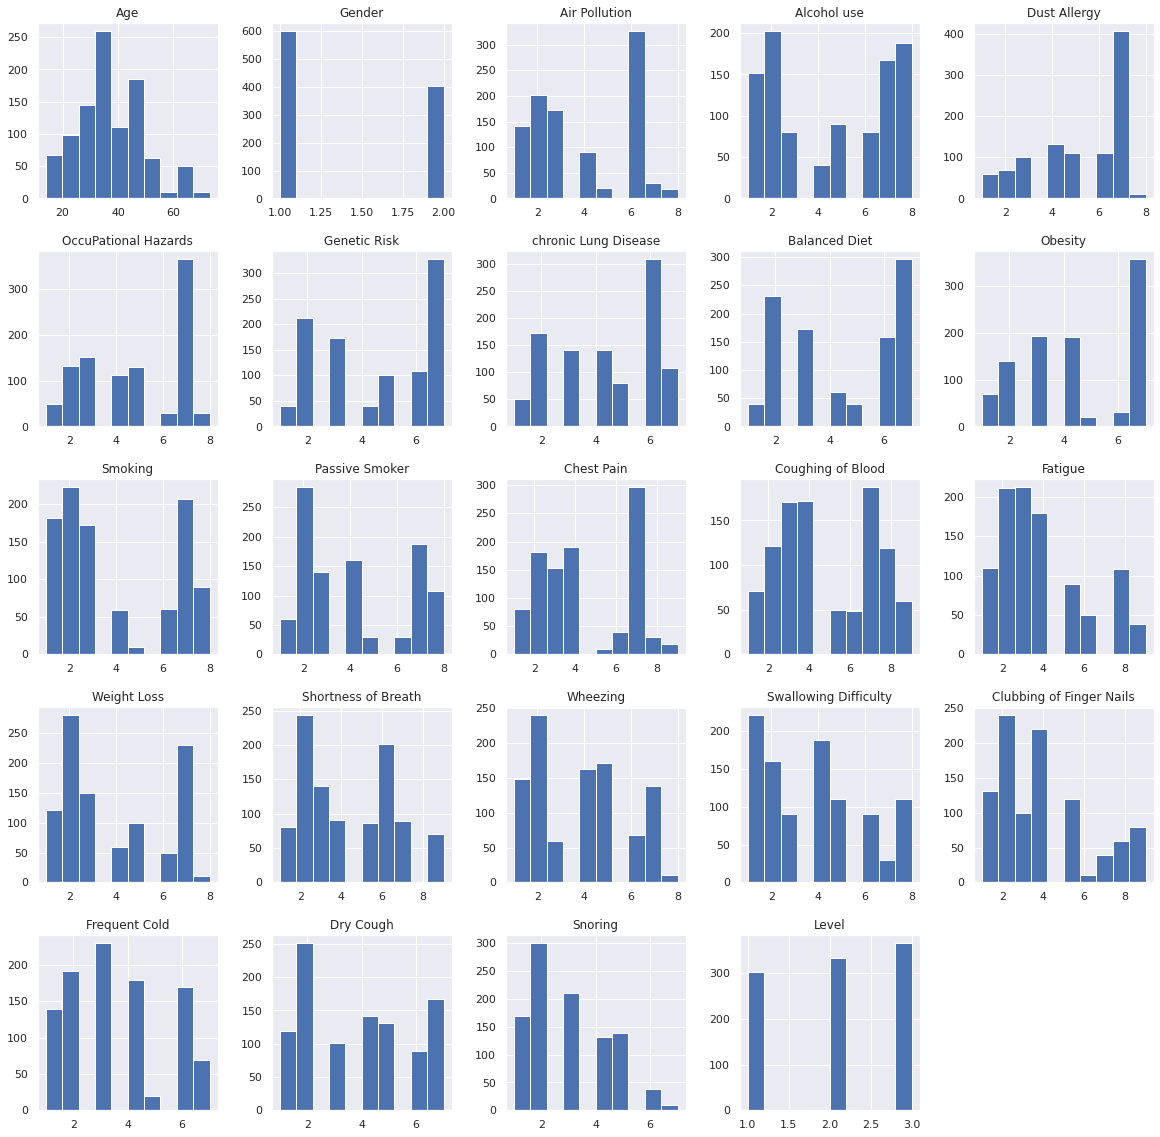

In [ ]:
p = df4.hist(figsize = (20,20))

In [ ]:
df4.shape

(1000, 25)

In [ ]:
df5=df4.drop(columns=['Patient Id'])

In [ ]:
df5c=df5.corr().T

In [ ]:
df5c.head(24)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
features = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']

In [ ]:
y = df.Level 
X = df[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
model = RandomForestRegressor(random_state = 1)

In [ ]:
y_train_new = []
for value in y_train:
    if value == 'Low':
        y_train_new.append(1)
    elif value == 'Medium':
        y_train_new.append(2)
    elif value == 'High':
        y_train_new.append(3)
    else:
        print("I encountered an unknown value.")

In [ ]:
y_train

298    Medium
160       Low
268       Low
658      High
996      High
        ...  
767      High
72     Medium
908      High
235       Low
37        Low
Name: Level, Length: 750, dtype: object

In [ ]:
len(y_train_new)

750

In [ ]:
y_train_new = pd.Series(y_train_new)

In [ ]:
y_train_new

0      2
1      1
2      1
3      3
4      3
      ..
745    3
746    2
747    3
748    1
749    1
Length: 750, dtype: int64

In [ ]:
model.fit(X_train, y_train_new)

RandomForestRegressor(random_state=1)

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test_new = []
for value in y_test:
    if value == 'Low':
        y_test_new.append(1)
    elif value == 'Medium':
        y_test_new.append(2)
    elif value == 'High':
        y_test_new.append(3)
    else:
        print("I encountered an unknown value.")

In [ ]:
y_test_new = pd.Series(y_test_new)

In [ ]:
y_test_new.value_counts()

3    94
2    78
1    78
dtype: int64

In [ ]:
mae = mean_absolute_error(pred, y_test_new)

In [ ]:
mae

4.000000000000004e-05

In [ ]:
pred

array([2.  , 1.  , 2.  , 1.  , 3.  , 1.  , 1.  , 1.  , 3.  , 1.  , 1.  ,
       3.  , 2.  , 2.  , 2.  , 3.  , 3.  , 1.  , 1.  , 1.  , 1.  , 3.  ,
       1.  , 1.  , 3.  , 2.  , 3.  , 3.  , 1.  , 1.  , 3.  , 1.  , 2.  ,
       1.  , 2.  , 1.  , 2.  , 1.  , 3.  , 1.  , 3.  , 2.  , 2.  , 2.  ,
       3.  , 3.  , 3.  , 1.  , 2.  , 3.  , 1.  , 1.  , 2.  , 2.  , 1.  ,
       3.  , 3.  , 3.  , 1.  , 2.  , 2.  , 2.  , 1.  , 3.  , 1.  , 3.  ,
       3.  , 1.  , 2.  , 3.  , 1.  , 1.  , 2.  , 2.  , 1.  , 2.  , 2.  ,
       1.  , 3.  , 2.  , 1.  , 2.  , 3.  , 3.  , 2.  , 3.  , 2.  , 2.  ,
       3.  , 2.  , 3.  , 2.  , 2.  , 3.  , 2.  , 3.  , 3.  , 1.  , 1.  ,
       1.  , 1.  , 3.  , 3.  , 1.  , 3.  , 1.  , 1.  , 3.  , 1.  , 1.  ,
       2.  , 2.  , 1.  , 1.  , 3.  , 2.  , 1.  , 3.  , 2.  , 3.  , 2.  ,
       3.  , 3.  , 2.  , 3.  , 3.  , 3.  , 2.  , 2.  , 2.  , 3.  , 2.  ,
       3.  , 3.  , 3.  , 2.  , 3.  , 2.  , 2.  , 3.  , 2.  , 1.  , 1.  ,
       3.  , 3.  , 2.  , 2.  , 3.  , 3.  , 3.  , 3.

In [ ]:
y_test_new

0      2
1      1
2      2
3      1
4      3
      ..
245    1
246    3
247    3
248    2
249    2
Length: 250, dtype: int64